# About - Dataset:

The dataset provided for this project is focused on heart failure, a critical medical condition characterized by 
the heart's inability to pump blood effectively, leading to inadequate circulation throughout the body. Here's an 
overview of the dataset:

# Title: Heart Failure Clinical Records Datase

Source: The dataset was collected at the Faisalabad Institute of Cardiology and the Allied Hospital in 
Faisalabad, Punjab, Pakistan, during the period of April to December in 2015. It was later made available on 
Kaggle.


Description: The dataset comprises medical records of 299 patients diagnosed with heart failure. These records 
include various clinical, body, and lifestyle information of the patients. The dataset encompasses 13 features, 
providing insights into the patients' health status and potential risk factors for heart failure.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [2]:
# Specify the file path
file_path = 'C:/Users/ADMIN/Downloads/heart_failure_clinical_records_dataset.csv'  # Example file path

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)


1. What is the distribution of age among heart failure patients in the dataset?

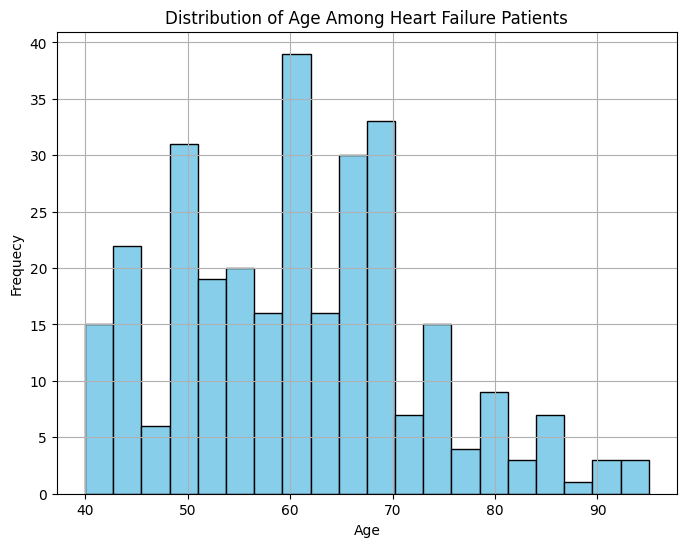

In [3]:
# Extract the column containing age data
age_data = df['age']

# Plot a histogram to visualize the distribution of ages
plt.figure(figsize = (8,6))
plt.hist(age_data, bins = 20, color = 'skyblue', edgecolor = 'black')
plt.title('Distribution of Age Among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequecy')
plt.grid(True)
plt.show()
         

2. How does the death rate vary with age?

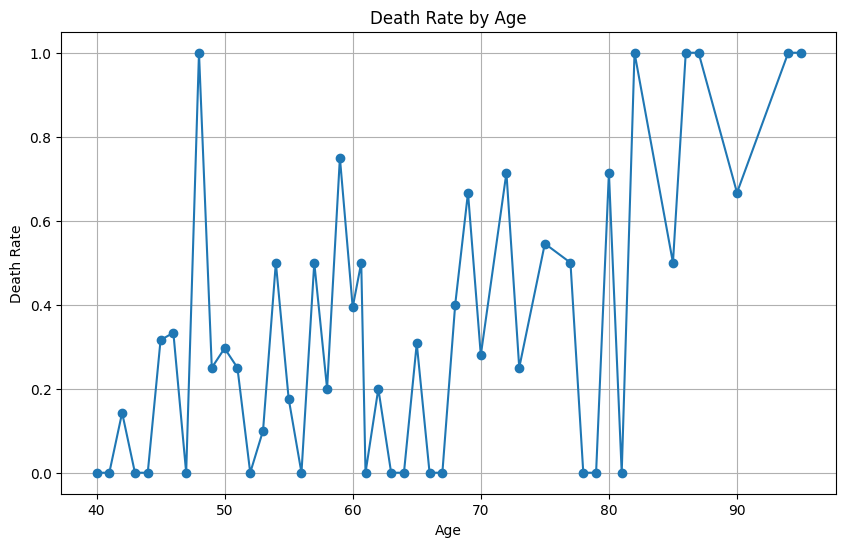

In [4]:
# Extract relevant columns (age and death event)
data = df[['age', 'DEATH_EVENT']]

# Step 3: Group data by age and calculate death rate
death_rate_by_age = data.groupby('age')['DEATH_EVENT'].mean().reset_index()

# Step 4: Visualize the relationship between age and death rate
plt.figure(figsize=(10, 6))
plt.plot(death_rate_by_age['age'], death_rate_by_age['DEATH_EVENT'], marker='o', linestyle='-')
plt.title('Death Rate by Age')
plt.xlabel('Age')
plt.ylabel('Death Rate')
plt.grid(True)
plt.show()

3.  What is the percentage of male and female patients in the dataset?

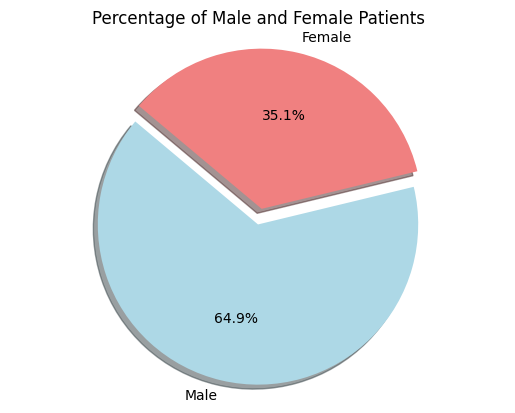

In [5]:
# Calculate the count of male and female patients
male_count = df[df['sex'] == 1].shape[0]
female_count = df[df['sex'] == 0].shape[0]

# Step 3: Calculate the percentage of male and female patients
total_patients = male_count + female_count
male_percentage = (male_count / total_patients) * 100
female_percentage = (female_count / total_patients) * 100

# Step 4: Visualize the percentage distribution
labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice (Male)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Male and Female Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

4. How does the platelet count vary among different age group?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7556\2478142252.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_platelet_by_age = df.groupby('age_group')['platelets'].mean()


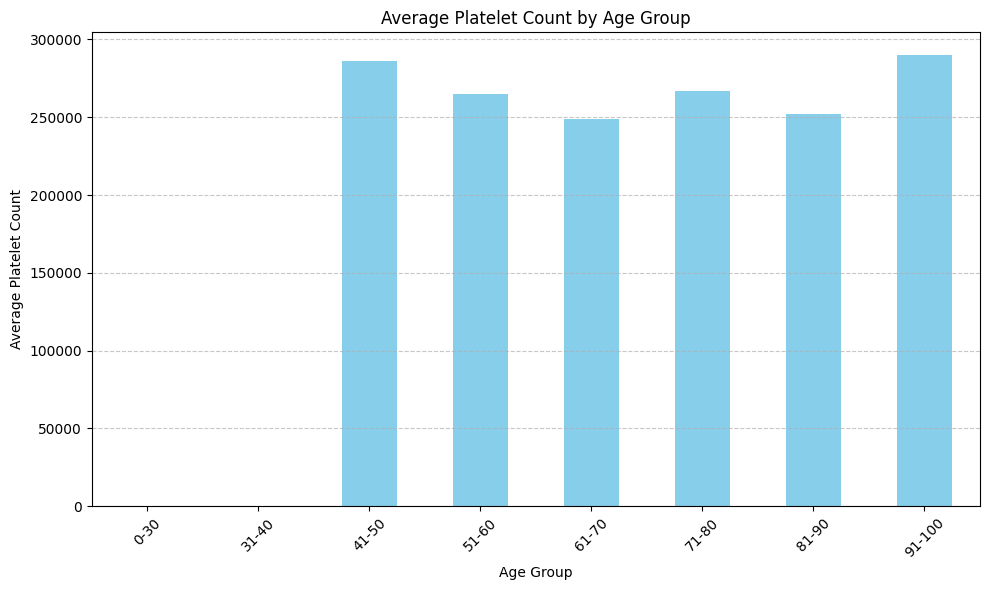

In [6]:
# Define age bins
age_bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Step 3: Bin the ages and calculate average platelet count for each age group
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
average_platelet_by_age = df.groupby('age_group')['platelets'].mean()

# Step 4: Plot the average platelet count by age group
plt.figure(figsize=(10, 6))
average_platelet_by_age.plot(kind='bar', color='skyblue')
plt.title('Average Platelet Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Platelet Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

5. How does the prevalence of high blood  pressure differ between male and female patients?

In [7]:
# Calculate the correlation coefficient between creatinine and sodium levels
correlation_coefficient = df['serum_creatinine'].corr(df['serum_sodium'])

# Step 3: Output the correlation coefficient
print("Correlation coefficient between creatinine and sodium levels:", correlation_coefficient)

Correlation coefficient between creatinine and sodium levels: -0.18909521009117392


6. How does the prevalence of high blood  pressure differ between male and female patients

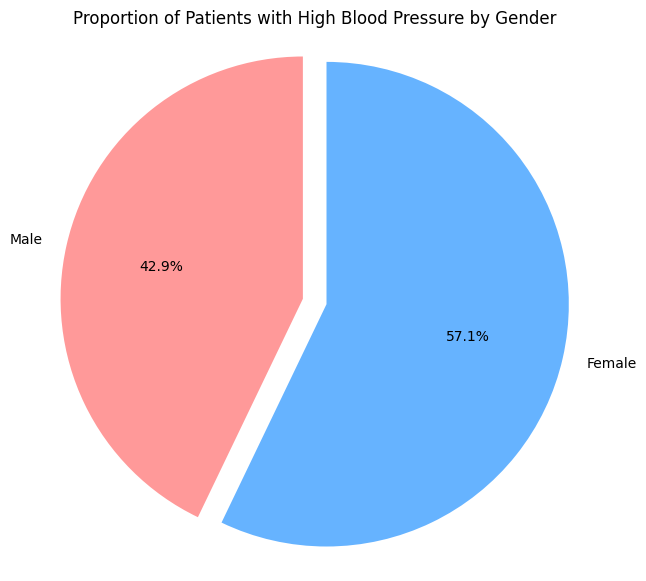

In [8]:
# Calculate the proportion of male and female patients with high blood pressure
male_high_bp_count = ((df['high_blood_pressure'] == 1) & (df['sex'] == 1)).sum()
female_high_bp_count = ((df['high_blood_pressure'] == 1) & (df['sex'] == 0)).sum()
total_male_count = (df['sex'] == 1).sum()
total_female_count = (df['sex'] == 0).sum()

proportion_male_high_bp = male_high_bp_count / total_male_count
proportion_female_high_bp = female_high_bp_count / total_female_count

# Step 3: Visualize the comparison between male and female patients with high blood pressure
labels = ['Male', 'Female']
sizes = [proportion_male_high_bp, proportion_female_high_bp]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode 1st slice (Male)

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Patients with High Blood Pressure by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

7. what is the relationship between smoking habits and the occurance of heart failure


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_group'],
      dtype='object')


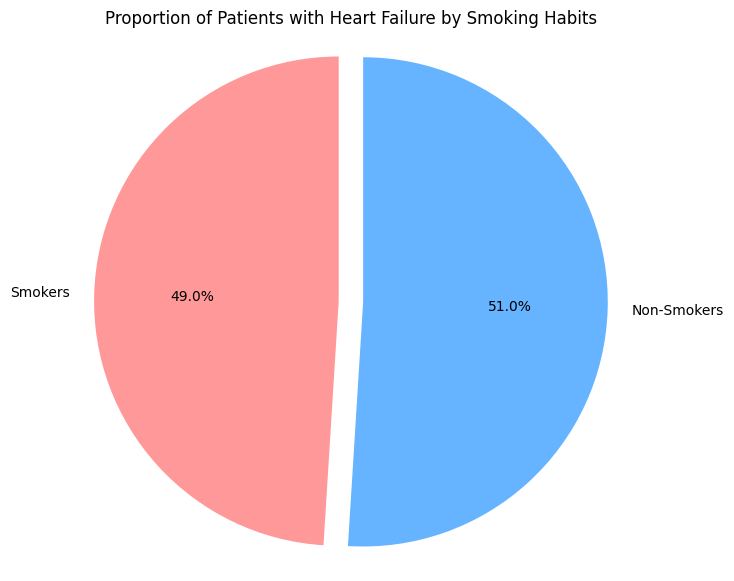

In [9]:
# Print the column names to identify the correct column for smoking habits
print(df.columns)

# Replace 'Smoking' with the correct column name from the output of df.columns
# For example, if 'Smoking' is not the correct column name, replace it with the correct one.

# Step 2: Calculate the proportion of patients who smoke and have experienced heart failure
smoking_hf_count = ((df['smoking'] == 1) & (df['DEATH_EVENT'] == 1)).sum()
smoking_total_count = (df['smoking'] == 1).sum()
proportion_smoking_hf = smoking_hf_count / smoking_total_count

# Step 3: Calculate the proportion of patients who do not smoke and have experienced heart failure
non_smoking_hf_count = ((df['smoking'] == 0) & (df['DEATH_EVENT'] == 1)).sum()
non_smoking_total_count = (df['smoking'] == 0).sum()
proportion_non_smoking_hf = non_smoking_hf_count / non_smoking_total_count

# Step 4: Visualize the relationship between smoking habits and heart failure
labels = ['Smokers', 'Non-Smokers']
sizes = [proportion_smoking_hf, proportion_non_smoking_hf]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Patients with Heart Failure by Smoking Habits')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

8. Are there any noticeable pattern in distribustion of death events across different age group?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7556\346744005.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_events_by_age_group = df.groupby('Age_Group')['DEATH_EVENT'].sum()


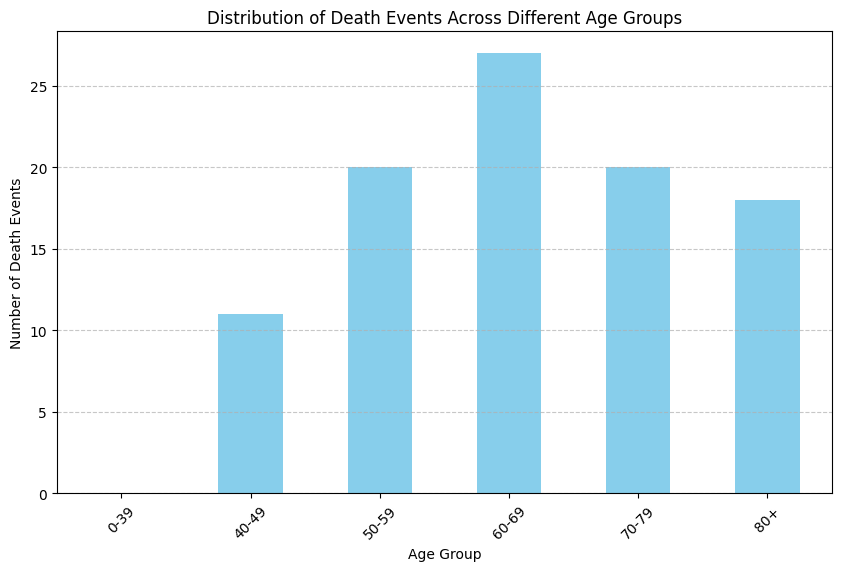

In [10]:
# Step 2: Divide the dataset into different age groups
age_bins = [0, 40, 50, 60, 70, 80, 100]
age_labels = ['0-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['Age_Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Step 3: Calculate the number of death events in each age group
death_events_by_age_group = df.groupby('Age_Group')['DEATH_EVENT'].sum()

# Step 4: Visualize the distribution of death events across different age groups
plt.figure(figsize=(10, 6))
death_events_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Distribution of Death Events Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Death Events')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

9. is there any significant difference in ejection fraction between patients with and without diabetes?

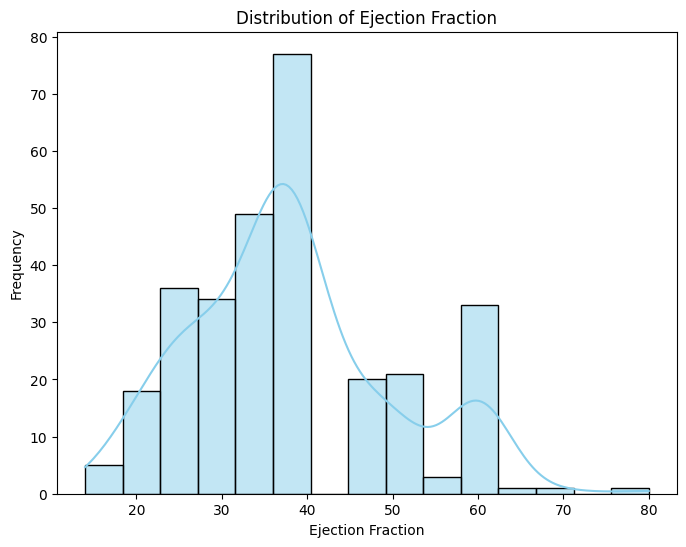

In [11]:
#Explore the distribution of ejection fraction
plt.figure(figsize=(8, 6))
sns.histplot(df['ejection_fraction'], kde=True, color='skyblue')
plt.title('Distribution of Ejection Fraction')
plt.xlabel('Ejection Fraction')
plt.ylabel('Frequency')
plt.show()

10. How does the serum creatinine level vary between patients who survived  and those who did not?

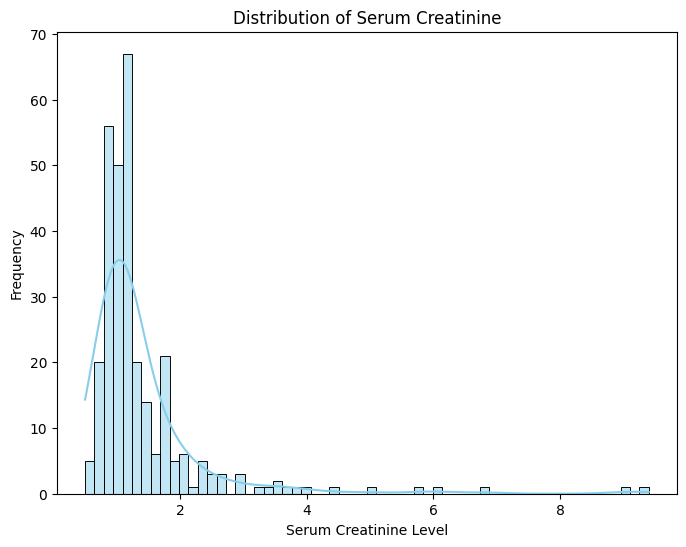

T-test Results:
T-statistic: -5.306457599754319
P-value: 2.1901978548979685e-07


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7556\170608275.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df, palette='Set2')


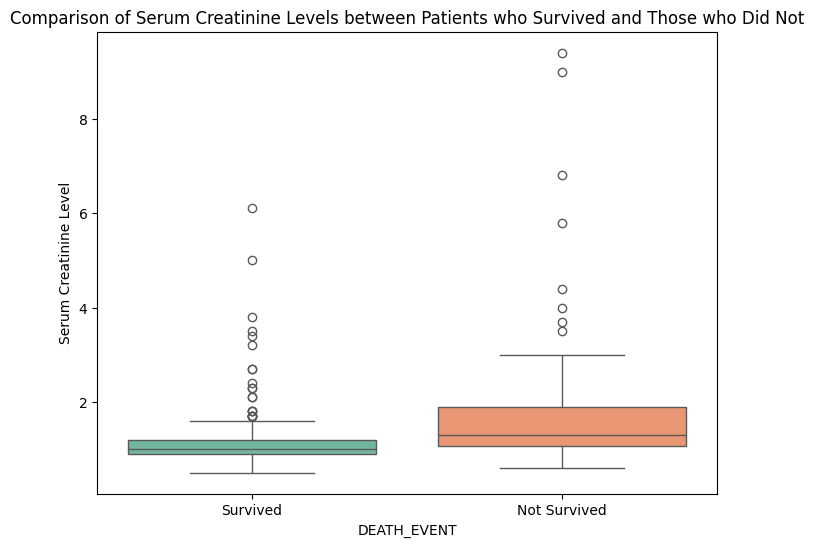

In [12]:
# Explore the distribution of serum creatinine
plt.figure(figsize=(8, 6))
sns.histplot(df['serum_creatinine'], kde=True, color='skyblue')
plt.title('Distribution of Serum Creatinine')
plt.xlabel('Serum Creatinine Level')
plt.ylabel('Frequency')
plt.show()

# Step 3: Compare serum creatinine levels between patients who survived and those who did not
creatinine_survived = df[df['DEATH_EVENT'] == 0]['serum_creatinine']
creatinine_not_survived = df[df['DEATH_EVENT'] == 1]['serum_creatinine']

# Perform t-test to compare serum creatinine levels
t_stat, p_value = ttest_ind(creatinine_survived, creatinine_not_survived)

# Print t-test results
print("T-test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Step 4: Visualize the comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df, palette='Set2')
plt.title('Comparison of Serum Creatinine Levels between Patients who Survived and Those who Did Not')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Serum Creatinine Level')
plt.xticks(ticks=[0, 1], labels=['Survived', 'Not Survived'])
plt.show()